In [86]:
import pandas as pd
import numpy as np

In [87]:
car_charges = pd.read_csv('car_price_dataset.csv')

In [88]:
car_charges.head()

Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867

In [89]:
car_charges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [90]:
car_charges.describe() #only shows intgers and float

Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000

In [91]:
import plotly.express as px

In [92]:
import matplotlib

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20,10)
matplotlib.rcParams['figure.facecolor'] = "#000000"

In [95]:
fig  = px.histogram(car_charges,x='Year',marginal='box',title = 'Count of years')
fig.show()

In [96]:
fig  = px.histogram(car_charges,x='Engine_Size',marginal='box',title = 'Count of each Engine_size')
fig.show()

In [97]:
fig  = px.histogram(car_charges,x='Mileage',marginal='box',title = 'Count of cars with diff mileage')
fig.show()

In [98]:
fig = px.histogram(car_charges, 
                   x='Doors',  
                   title='Distribution of Car Doors',
                   histnorm='percent',  # Normalize counts if needed
                   nbins=5)  # Adjust bin count

fig.show()

In [99]:
car_charges['Doors_str'] = car_charges['Doors'].astype(str)
#convert to string to use it and see proper space between columsn

In [100]:
import plotly.express as px

# Convert 'Doors' to string for visualization
car_charges['Doors_str'] = car_charges['Doors'].astype(str)

fig = px.bar(car_charges, 
             x='Doors_str',  
             title='Number of Doors (Categorical)',
             text_auto=True)  # Show count labels on bars

fig.update_layout(xaxis={'categoryorder':'category ascending'})  # Ensures correct order
fig.show()


In [101]:
fig  = px.histogram(car_charges,x='Owner_Count',marginal='box',title = 'Owner count')
fig.show()

In [102]:
fig  = px.histogram(car_charges,x='Price',marginal='box',title = 'Price')
fig.show()
#observe here we can see something interstng , its a bell curve with mean at around 9k

In [103]:
fig  = px.histogram(car_charges,x='Price',marginal='box',color='Fuel_Type', color_discrete_map={
                       'Petrol': 'red',
                       'Diesel': 'green',
                       'Electric': 'blue',
                       'Hybrid': 'grey'
                   },title = 'Price')
fig.show()
#impo read this , also count is alsmost same

In [104]:
car_charges.Fuel_Type.value_counts()

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

In [105]:
car_charges.Brand.value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

In [106]:
px.histogram(car_charges,x='Fuel_Type',color='Brand',title='Fuel_Type')

In [107]:
print(car_charges.corr(numeric_only=True)['Price'].sort_values(ascending=False))
#most impo step

Price          1.000000
Year           0.663036
Engine_Size    0.357403
Owner_Count    0.002656
Doors          0.000511
Mileage       -0.551227
Name: Price, dtype: float64


In [108]:
fig = px.violin(car_charges,x='Year',y='Price',color='Fuel_Type',title='Year vs Price')
fig.show()
#generally as years go buy prices on median inc

In [109]:
fig = px.violin(car_charges,x='Engine_Size',y='Price',color='Fuel_Type',title='Engine_Size vs Price')
fig.show()
#as enginge_size inc the prices do inc , not that much but they do

In [110]:
car_charges.Price.corr(car_charges.Engine_Size)

np.float64(0.3574034753558666)

In [111]:
car_charges.Price.corr(car_charges.Year)

np.float64(0.6630358185023517)

In [112]:
#to convert fuel type to numerical, using one hot encoding is longer and tougher
Fuel_Type_mapping = {'Diesel': 1, 'Petrol': 2, 'Hybrid': 3, 'Electric': 4}
car_charges['Fuel_Type_Ordinal'] = car_charges['Fuel_Type'].map(Fuel_Type_mapping)
car_charges.Price.corr(car_charges.Fuel_Type_Ordinal)

np.float64(0.24669684721664378)

In [113]:
car_charges.corr(numeric_only='true')

Year  Engine_Size   Mileage     Doors  Owner_Count  \
Year               1.000000    -0.001306 -0.002476  0.014867     0.000116   
Engine_Size       -0.001306     1.000000  0.015135 -0.009844     0.007122   
Mileage           -0.002476     0.015135  1.000000  0.007879     0.006287   
Doors              0.014867    -0.009844  0.007879  1.000000    -0.005431   
Owner_Count        0.000116     0.007122  0.006287 -0.005431     1.000000   
Price              0.663036     0.357403 -0.551227  0.000511     0.002656   
Fuel_Type_Ordinal -0.009306    -0.006884 -0.002044 -0.000115     0.007352   

                      Price  Fuel_Type_Ordinal  
Year               0.663036          -0.009306  
Engine_Size        0.357403          -0.006884  
Mileage           -0.551227          -0.002044  
Doors              0.000511          -0.000115  
Owner_Count        0.002656           0.007352  
Price              1.000000           0.246697  
Fuel_Type_Ordinal  0.246697           1.000000

<Axes: title={'center': 'Year vs Price'}, xlabel='Year', ylabel='Price'>

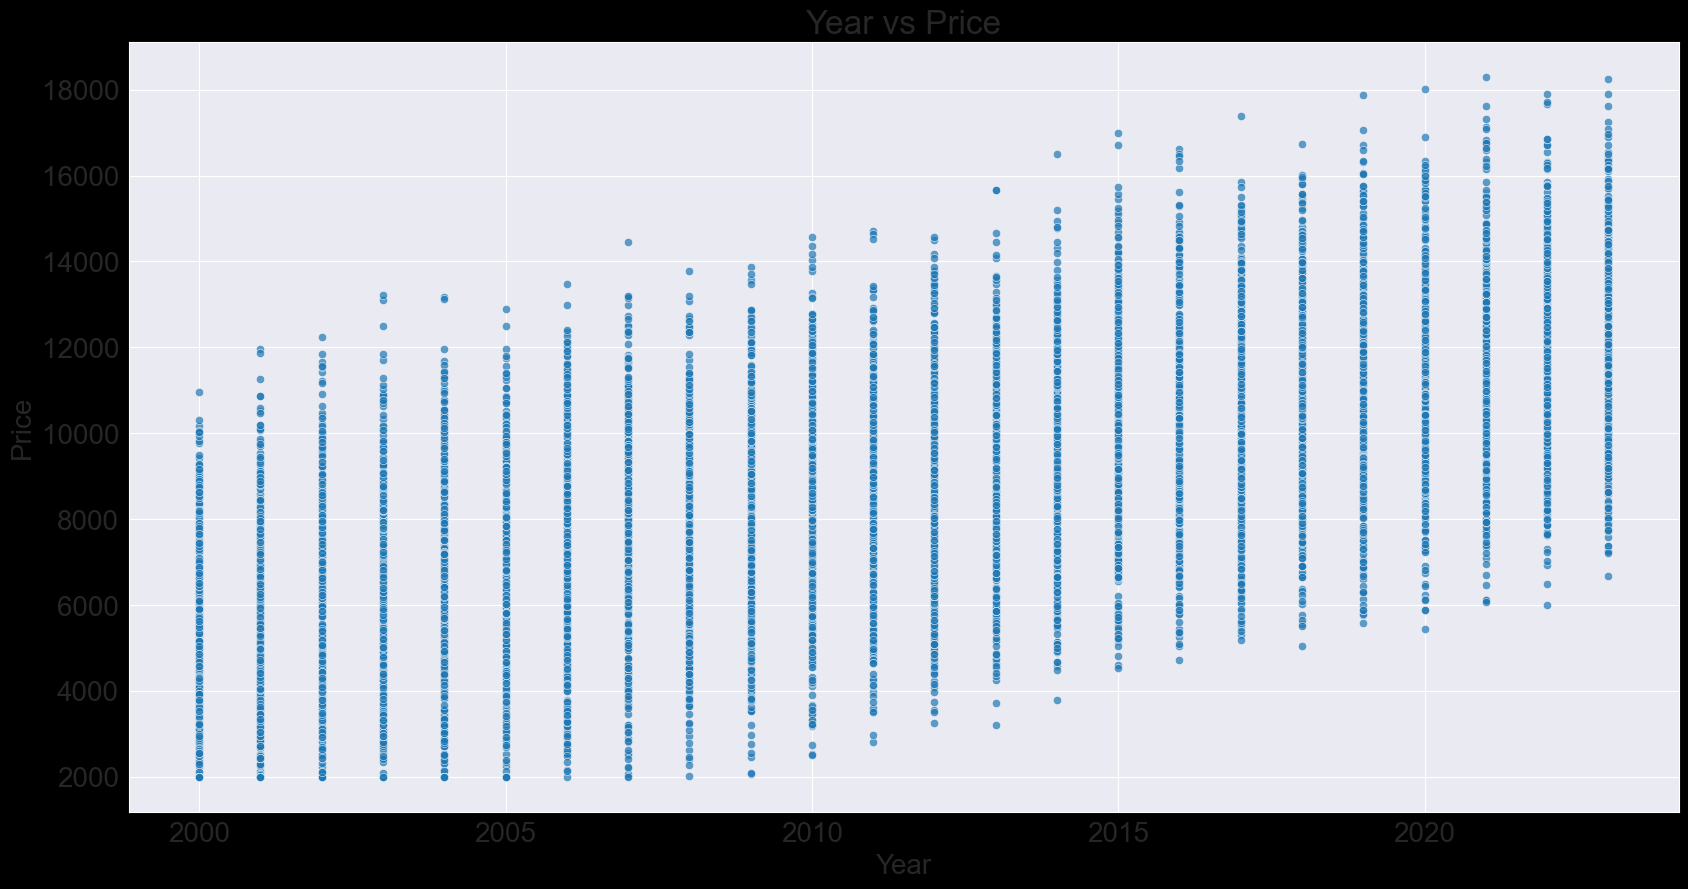

In [114]:
#we will make a linear model with w*year+b , but first lets plot
plt.title('Year vs Price')
sns.scatterplot(data=car_charges,x='Year',y='Price',alpha=0.7)

In [115]:
car_charges['Year_Normalized'] = car_charges['Year'] - car_charges['Year'].min()

In [116]:
def estimate_charges(Year_Normalized,w,b):
    return w*Year_Normalized+b

In [117]:
w=50
b=1

In [118]:
estimate_charges(2014,w,b)

100701

In [119]:
normalized_years = car_charges['Year_Normalized']
estimated_charges = estimate_charges(normalized_years, w, b)
estimated_charges

0       1001
1        601
2       1001
3       1151
4        151
        ... 
9995     201
9996     101
9997     501
9998     101
9999      51
Name: Year_Normalized, Length: 10000, dtype: int64

In [120]:
w = 1000

In [121]:
estimated_charges = estimate_charges(normalized_years,w,b)
estimated_charges

0       20001
1       12001
2       20001
3       23001
4        3001
        ...  
9995     4001
9996     2001
9997    10001
9998     2001
9999     1001
Name: Year_Normalized, Length: 10000, dtype: int64

In [122]:
car_charges['Year_Normalized']

0       20
1       12
2       20
3       23
4        3
        ..
9995     4
9996     2
9997    10
9998     2
9999     1
Name: Year_Normalized, Length: 10000, dtype: int64

Text(0, 0.5, 'Estimated charges')

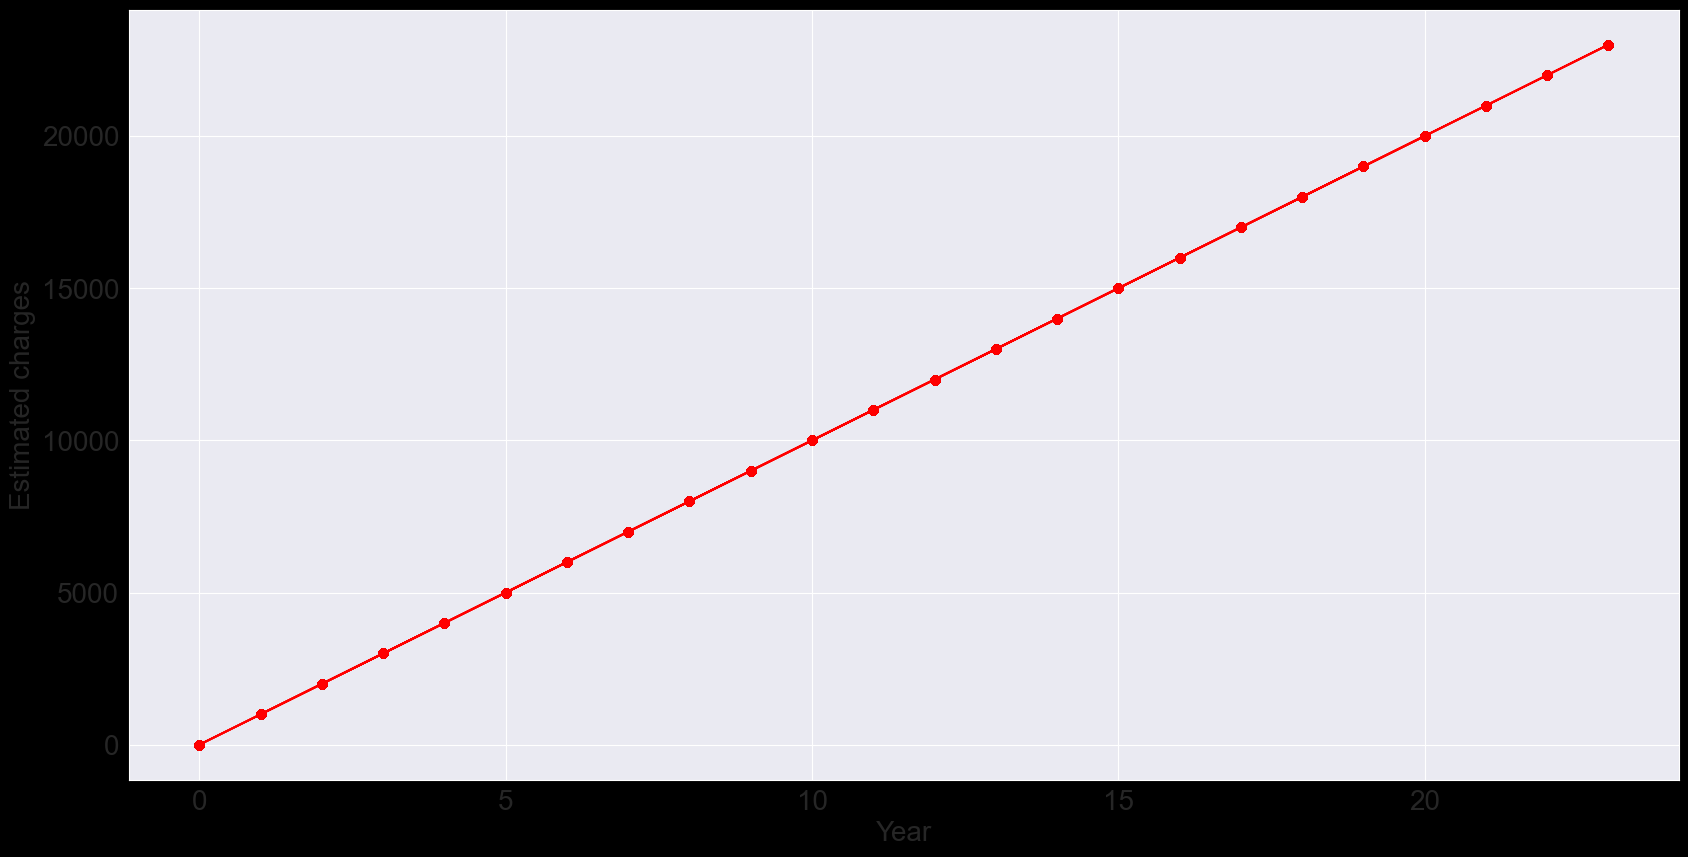

In [123]:
plt.plot(normalized_years,estimated_charges,'r-o')
plt.xlabel('Year')
plt.ylabel('Estimated charges')

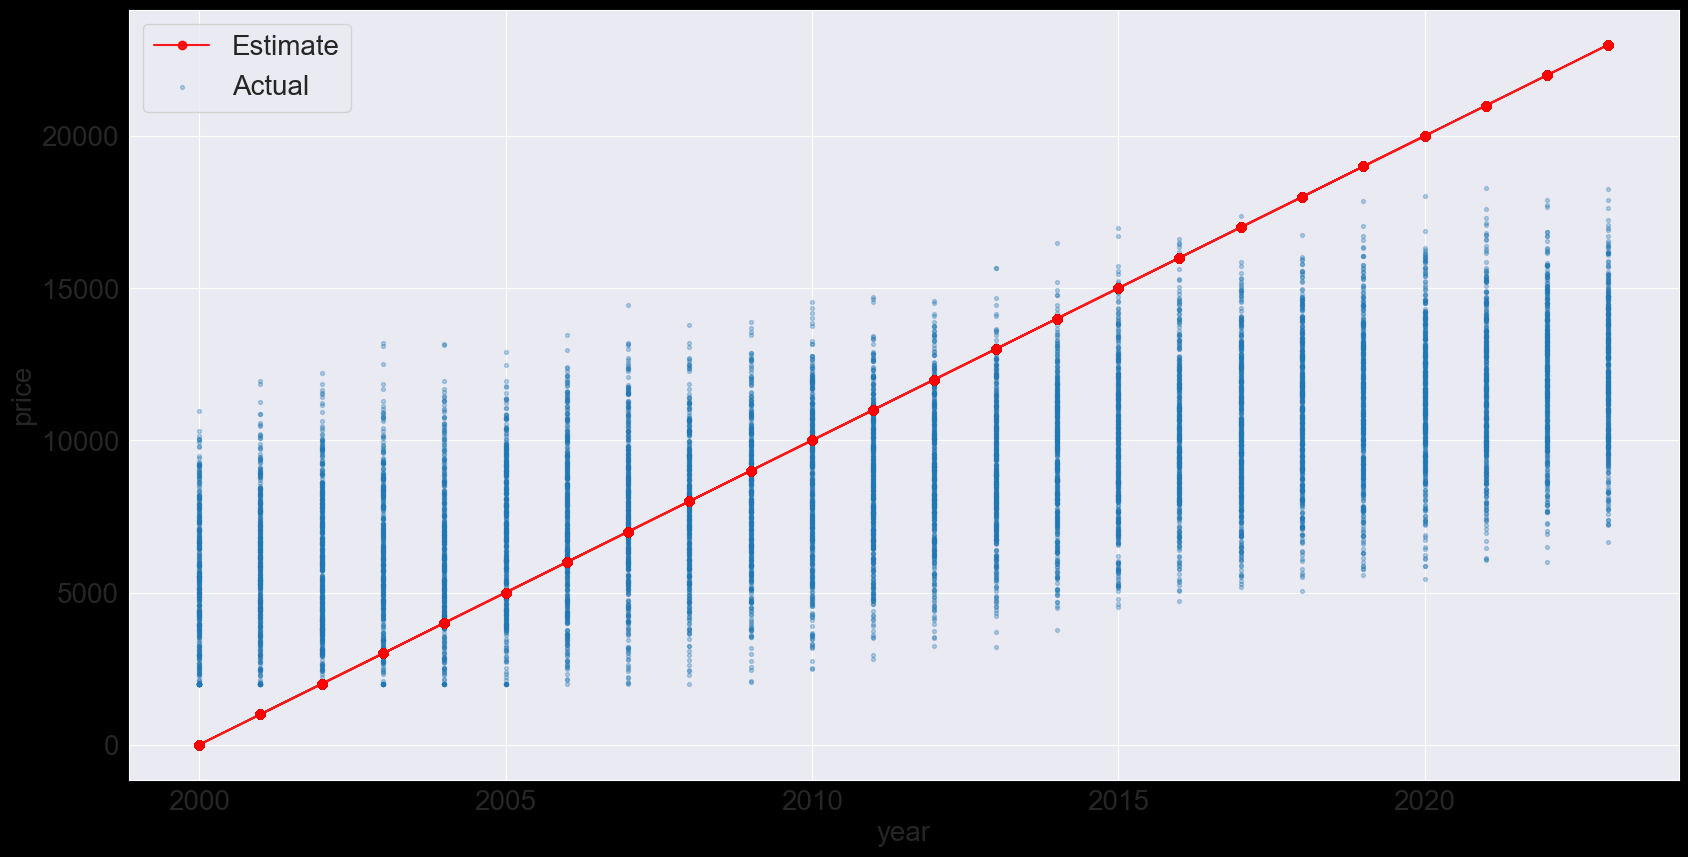

In [124]:
target = car_charges.Price
plt.plot(normalized_years,estimated_charges,'r-o',alpha=0.9)
plt.scatter(normalized_years,target,s=8,alpha=0.3)
# ✅ Show only specific years on x-axis
custom_ticks = [2000, 2005, 2010, 2015, 2020]  # Choose years you want
plt.xticks([year - min(car_charges['Year']) for year in custom_ticks], custom_ticks)  # Map to normalized
plt.xlabel('year')
plt.ylabel('price')
plt.legend(['Estimate','Actual'])

In [125]:

def try_parameter(w, b):
    car_charges['Year_Normalized'] = car_charges['Year'] - car_charges['Year'].min()
    
    normalized_years = car_charges['Year_Normalized']
    estimated_charges = w * normalized_years + b  # Directly compute estimated charges

    plt.plot(normalized_years, estimated_charges, 'r-o')
    plt.xlabel('Year')
    plt.ylabel('Estimated charges')

    target = car_charges.Price
    plt.plot(normalized_years, estimated_charges, 'r-o', alpha=0.9)
    plt.scatter(normalized_years, target, s=8, alpha=0.3)

    # ✅ Show only specific years on x-axis
    custom_ticks = [2000, 2005, 2010, 2015, 2020]  # Choose years you want
    plt.xticks([year - min(car_charges['Year']) for year in custom_ticks], custom_ticks)  # Map to normalized

    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend(['Estimate', 'Actual'])
    plt.show()



In [126]:
import matplotlib.pyplot as plt

def try_parameter(w, b):
    if 'Year' not in car_charges or 'Price' not in car_charges:
        print("Error: DataFrame must contain 'Year' and 'Price' columns.")
        return
    
    car_charges['Year_Normalized'] = car_charges['Year'] - car_charges['Year'].min()
    
    normalized_years = car_charges['Year_Normalized']
    estimated_charges = w * normalized_years + b  # Compute directly

    plt.figure(figsize=(8, 6))  # Ensure figure is created
    plt.plot(normalized_years, estimated_charges, 'r-o', alpha=0.9, label="Estimate")
    plt.scatter(normalized_years, car_charges.Price, s=8, alpha=0.3, label="Actual")

    # ✅ Show only specific years on x-axis
    custom_ticks = [2000, 2005, 2010, 2015, 2020]
    plt.xticks([year - min(car_charges['Year']) for year in custom_ticks], custom_ticks)

    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)  # Add grid for clarity
    plt.show()  # Display plot

# Example usage:
# try_parameter(1000, 5000)




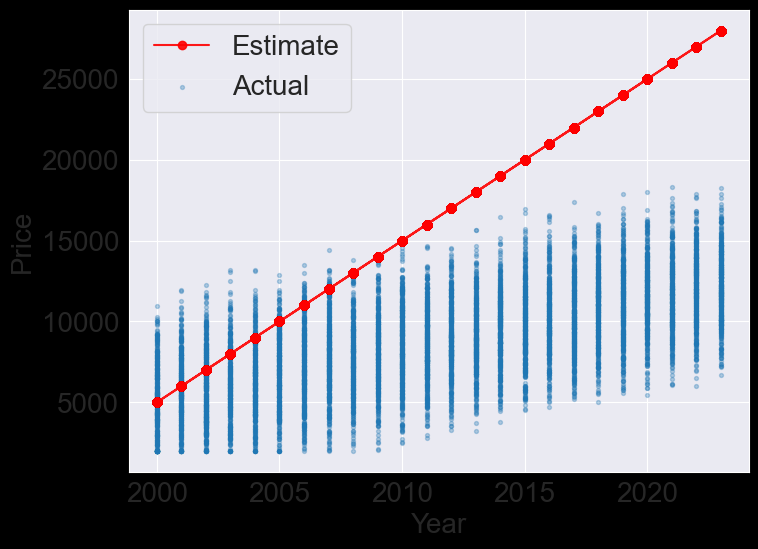

In [127]:
try_parameter(1000,5000)

In [128]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(target-predictions)))

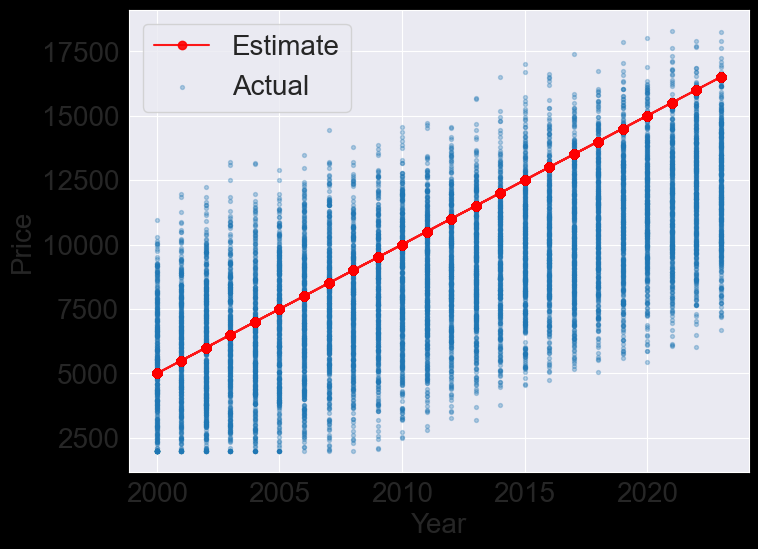

In [129]:
w=500
b=5000
try_parameter(w,b)

In [130]:
targets = car_charges['Price']
predicted = estimate_charges(car_charges['Year']-2000,w,b)
rmse(targets,predicted)

np.float64(3320.9925391665665)

In [131]:
pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
model = LinearRegression()

In [134]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [135]:
#lets subtract 2000 and make a new colum of updates years
car_charges['New_Year'] = car_charges['Year']-2000

In [136]:
car_charges.head(10)

Brand     Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia       Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet    Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes       GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi        Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   286618   
5      Toyota     Camry  2007          2.7    Petrol       Automatic   157889   
6       Honda     Civic  2010          3.4  Electric       Automatic   139584   
7         Kia  Sportage  2001          4.7  Electric  Semi-Automatic   157495   
8         Kia  Sportage  2014          2.6    Hybrid          Manual    98700   
9      Toyota      RAV4  2005          3.1    Petrol          Manual   107724   

   Doors  Owner_Count  Price Doors_str  Fuel_Type_Ordinal  Year_Normalized  \
0      3            5   8501         3                  1               20   
1      2            3  12092         2                  3               12   
2      4            2  11171         4                  1               20   
3      2            1  11780         2                  4               23   
4      3            3   2867         3                  3                3   
5      4            4   7242         4                  2                7   
6      3            1  11208         3                  4               10   
7      2            2   7950         2                  4                1   
8      3            4   9926         3                  3               14   
9      2            5   6545         2                  2                5   

   New_Year  
0        20  
1        12  
2        20  
3        23  
4         3  
5         7  
6        10  
7         1  
8        14  
9         5

In [137]:
inputs = car_charges[['New_Year']]
targets = car_charges.Price
print('inputs.shape:' , inputs.shape)
print('targets.shape:',targets.shape)

inputs.shape: (10000, 1)
targets.shape: (10000,)


In [138]:
model.fit(inputs,targets)
real_years = np.array([2000, 2001])  # The actual years
new_years = real_years - 2000  # Convert to model's expected format


In [139]:
model.predict(new_years.reshape(-1, 1))

C:\Users\adity\Documents\ml\my_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5399.13671191, 5698.33260994])

In [140]:
predictions = model.predict(inputs)

In [141]:
predictions

array([11383.05467251,  8989.48748827, 11383.05467251, ...,
        8391.09569221,  5997.52850797,  5698.33260994], shape=(10000,))

In [142]:
targets

0        8501
1       12092
2       11171
3       11780
4        2867
        ...  
9995     8884
9996     6240
9997     9866
9998     4084
9999     3342
Name: Price, Length: 10000, dtype: int64

In [143]:
rmse(targets,predictions)

np.float64(2329.935096077638)

In [144]:
#w coeff
model.coef_

array([299.19589803])

In [145]:
#b coeff
model.intercept_

np.float64(5399.136711911568)

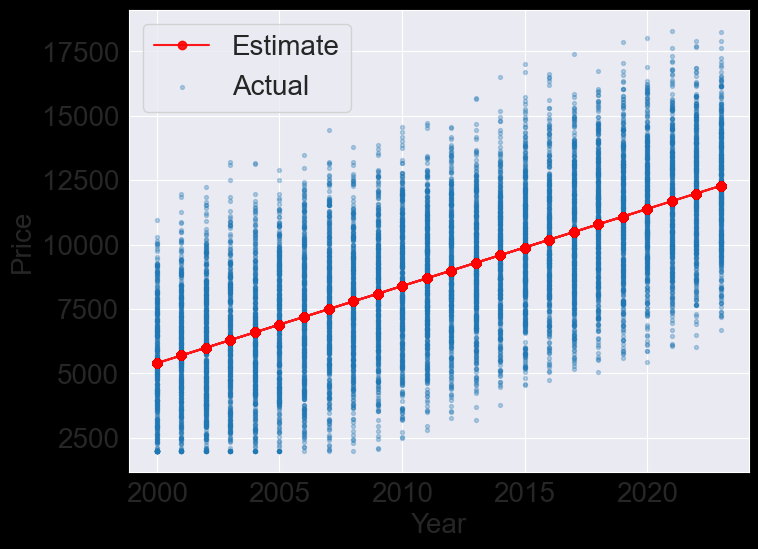

In [146]:
try_parameter(model.coef_,model.intercept_)

In [147]:
#IN SHORT
inputs,targets = car_charges[['New_Year']],car_charges['Price']
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:' , loss)

loss: 2329.935096077638


In [148]:
numeric_cols = car_charges.select_dtypes(include=['number'])  # Select only numeric columns
correlations = numeric_cols.corr()  # Compute correlation matrix
correlations_with_price = correlations["Price"].abs().sort_values(ascending=False)  # Sort by absolute correlation

print(correlations_with_price)


Price                1.000000
Year                 0.663036
Year_Normalized      0.663036
New_Year             0.663036
Mileage              0.551227
Engine_Size          0.357403
Fuel_Type_Ordinal    0.246697
Owner_Count          0.002656
Doors                0.000511
Name: Price, dtype: float64


In [149]:
#LETS INCLUDE MILEAGE VS PRICE
#IN SHORT
inputs,targets = car_charges[['New_Year','Mileage']],car_charges['Price']
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:' , loss)

loss: 1581.9573428709473


In [150]:
#TO see 3D
fig = px.scatter_3d(car_charges,x='New_Year',y='Mileage',z='Price')
fig.update_traces(marker_size=3,marker_opacity=0.5)
fig.show()

In [151]:
#LETs also add rest of the parameters 
inputs,targets = car_charges[['New_Year','Mileage','Engine_Size','Fuel_Type_Ordinal','Owner_Count','Doors']],car_charges['Price']
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:' , loss)

loss: 757.711128114542


In [152]:
categorical_cols = car_charges.select_dtypes(include=['object']).columns  # Get categorical column names
car_charges[categorical_cols]  # ✅ Now this will work

Brand     Model Fuel_Type    Transmission Doors_str
0            Kia       Rio    Diesel          Manual         3
1      Chevrolet    Malibu    Hybrid       Automatic         2
2       Mercedes       GLA    Diesel       Automatic         4
3           Audi        Q5  Electric          Manual         2
4     Volkswagen      Golf    Hybrid  Semi-Automatic         3
...          ...       ...       ...             ...       ...
9995         Kia    Optima    Diesel  Semi-Automatic         2
9996   Chevrolet    Impala  Electric       Automatic         2
9997         BMW  3 Series    Petrol       Automatic         5
9998        Ford  Explorer    Hybrid       Automatic         4
9999  Volkswagen    Tiguan    Diesel          Manual         3

[10000 rows x 5 columns]

[array(['Automatic', 'Manual', 'Semi-Automatic'], dtype=object)]

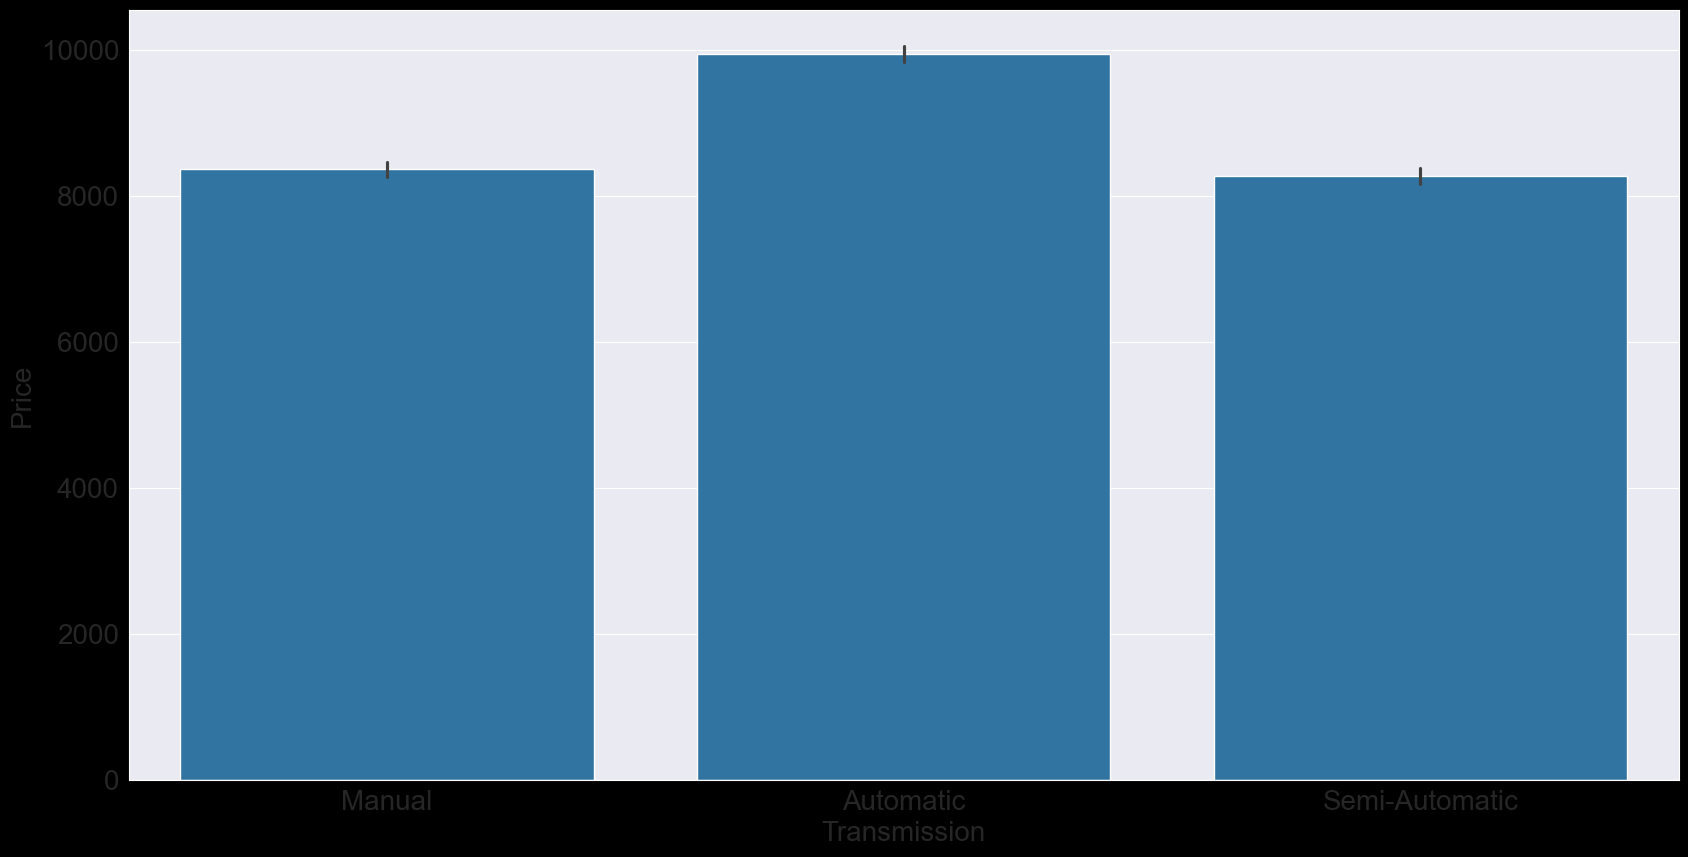

In [153]:
#We hv already made ordinal of fuel type which we hv already used before
#To do one hot encoding for Transmission 
sns.barplot(data = car_charges,x='Transmission',y='Price')
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(car_charges[['Transmission']])
enc.categories_


In [154]:
one_hot = enc.transform(car_charges[['Transmission']]).toarray()
one_hot

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(10000, 3))

In [155]:
car_charges[['a','m','sm']] = one_hot

In [156]:
car_charges

Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price Doors_str  Fuel_Type_Ordinal  \
0      289944      3            5   8501         3                  1   
1        5356      2            3  12092         2                  3   
2      231440      4            2  11171         4                  1   
3      160971      2            1  11780         2                  4   
4      286618      3            3   2867         3                  3   
...       ...    ...          ...    ...       ...                ...   
9995     5794      2            4   8884         2                  1   
9996   168000      2            1   6240         2                  4   
9997    86664      5            1   9866         5                  2   
9998   225772      4            1   4084         4                  3   
9999   157882      3            3   3342         3                  1   

      Year_Normalized  New_Year    a    m   sm  
0                  20        20  0.0  1.0  0.0  
1                  12        12  1.0  0.0  0.0  
2                  20        20  1.0  0.0  0.0  
3                  23        23  0.0  1.0  0.0  
4                   3         3  0.0  0.0  1.0  
...               ...       ...  ...  ...  ...  
9995                4         4  0.0  0.0  1.0  
9996                2         2  1.0  0.0  0.0  
9997               10        10  1.0  0.0  0.0  
9998                2         2  1.0  0.0  0.0  
9999                1         1  0.0  1.0  0.0  

[10000 rows x 17 columns]

In [157]:
#LETs also add our Transimssion also 
inputs,targets = car_charges[['New_Year','Mileage','Engine_Size','Fuel_Type_Ordinal','Owner_Count','Doors','a','sm','m']],car_charges['Price']
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:' , loss)

loss: 283.6861778510508


In [158]:
#Just tp
from sklearn.metrics import r2_score
r2 = r2_score(targets, predictions)
print(f"R² Score: {r2}")

R² Score: 0.9916924292697308


In [159]:
num_unique_brands = car_charges['Brand'].nunique()
print("Number of unique brands:", num_unique_brands)

Number of unique brands: 10


In [160]:
car_charges_encoded = pd.get_dummies(car_charges, columns=['Brand'], drop_first=True)

In [161]:
car_charges

Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price Doors_str  Fuel_Type_Ordinal  \
0      289944      3            5   8501         3                  1   
1        5356      2            3  12092         2                  3   
2      231440      4            2  11171         4                  1   
3      160971      2            1  11780         2                  4   
4      286618      3            3   2867         3                  3   
...       ...    ...          ...    ...       ...                ...   
9995     5794      2            4   8884         2                  1   
9996   168000      2            1   6240         2                  4   
9997    86664      5            1   9866         5                  2   
9998   225772      4            1   4084         4                  3   
9999   157882      3            3   3342         3                  1   

      Year_Normalized  New_Year    a    m   sm  
0                  20        20  0.0  1.0  0.0  
1                  12        12  1.0  0.0  0.0  
2                  20        20  1.0  0.0  0.0  
3                  23        23  0.0  1.0  0.0  
4                   3         3  0.0  0.0  1.0  
...               ...       ...  ...  ...  ...  
9995                4         4  0.0  0.0  1.0  
9996                2         2  1.0  0.0  0.0  
9997               10        10  1.0  0.0  0.0  
9998                2         2  1.0  0.0  0.0  
9999                1         1  0.0  1.0  0.0  

[10000 rows x 17 columns]

In [162]:
car_charges = pd.get_dummies(car_charges, columns=['Brand'], drop_first=True)

In [164]:
print(car_charges.columns)

Index(['Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage',
       'Doors', 'Owner_Count', 'Price', 'Doors_str', 'Fuel_Type_Ordinal',
       'Year_Normalized', 'New_Year', 'a', 'm', 'sm', 'Brand_BMW',
       'Brand_Chevrolet', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_Kia', 'Brand_Mercedes', 'Brand_Toyota', 'Brand_Volkswagen'],
      dtype='object')


In [169]:
# Identify your brand columns (they typically start with 'Brand_')
brand_cols = [col for col in car_charges.columns if col.startswith('Brand_')]

# Convert each brand column from boolean to int
for col in brand_cols:
    car_charges[col] = car_charges[col].astype(int)

# Now compute the correlation matrix on these columns along with Price
corr_matrix = car_charges[brand_cols + ['Price']].corr()

# Extract only the correlations of Price with the brand columns
brand_corr = corr_matrix['Price'].filter(like='Brand_')
print(brand_corr)

Brand_BMW          -0.015938
Brand_Chevrolet     0.017456
Brand_Ford         -0.000043
Brand_Honda        -0.020167
Brand_Hyundai      -0.007976
Brand_Kia           0.002866
Brand_Mercedes      0.013171
Brand_Toyota       -0.005768
Brand_Volkswagen    0.008166
Name: Price, dtype: float64


In [171]:
inputs = car_charges.select_dtypes(include=[np.number]).drop(columns=['Price'])# Select only numeric columns
targets = car_charges['Price']  # Define the target variable

model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print('loss:', loss)

loss: 283.60192167010246


In [172]:
model.coef_

array([ 9.96310623e+01,  9.92737217e+02, -1.98626704e-02, -3.56957022e+00,
        3.54676421e-01,  6.96594737e+02,  9.96310623e+01,  9.96310623e+01,
        9.95183985e+02, -4.95929314e+02, -4.99254671e+02,  7.77928544e+00,
        1.04918696e+01,  1.38055529e+01,  1.56299804e+01,  8.06851877e+00,
        2.13690959e+01,  2.12860884e+01,  1.59520351e+01,  2.22445839e+00])

In [186]:
coefficient


Feature  Coefficicent
0                Year     99.631062
1         Engine_Size    992.737217
2             Mileage     -0.019863
3               Doors     -3.569570
4         Owner_Count      0.354676
5   Fuel_Type_Ordinal    696.594737
6     Year_Normalized     99.631062
7            New_Year     99.631062
8                   a    995.183985
9                   m   -495.929314
10                 sm   -499.254671
11          Brand_BMW      7.779285
12    Brand_Chevrolet     10.491870
13         Brand_Ford     13.805553
14        Brand_Honda     15.629980
15      Brand_Hyundai      8.068519
16          Brand_Kia     21.369096
17     Brand_Mercedes     21.286088
18       Brand_Toyota     15.952035
19   Brand_Volkswagen      2.224458

In [179]:
#We see that most impo are Fuel type origndal, automatic or not , manual or not , and enginge _size but note fuel type and automatic or not is bianry , so we hv to make changeas

In [202]:
car_charges

Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  Doors  \
0          Rio  2020          4.2    Diesel          Manual   289944      3   
1       Malibu  2012          2.0    Hybrid       Automatic     5356      2   
2          GLA  2020          4.2    Diesel       Automatic   231440      4   
3           Q5  2023          2.0  Electric          Manual   160971      2   
4         Golf  2003          2.6    Hybrid  Semi-Automatic   286618      3   
...        ...   ...          ...       ...             ...      ...    ...   
9995    Optima  2004          3.7    Diesel  Semi-Automatic     5794      2   
9996    Impala  2002          1.4  Electric       Automatic   168000      2   
9997  3 Series  2010          3.0    Petrol       Automatic    86664      5   
9998  Explorer  2002          1.4    Hybrid       Automatic   225772      4   
9999    Tiguan  2001          2.1    Diesel          Manual   157882      3   

      Owner_Count  Price Doors_str  ...   sm  Brand_BMW  Brand_Chevrolet  \
0               5   8501         3  ...  0.0          0                0   
1               3  12092         2  ...  0.0          0                1   
2               2  11171         4  ...  0.0          0                0   
3               1  11780         2  ...  0.0          0                0   
4               3   2867         3  ...  1.0          0                0   
...           ...    ...       ...  ...  ...        ...              ...   
9995            4   8884         2  ...  1.0          0                0   
9996            1   6240         2  ...  0.0          0                1   
9997            1   9866         5  ...  0.0          1                0   
9998            1   4084         4  ...  0.0          0                0   
9999            3   3342         3  ...  0.0          0                0   

      Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Kia  Brand_Mercedes  \
0              0            0              0          1               0   
1              0            0              0          0               0   
2              0            0              0          0               1   
3              0            0              0          0               0   
4              0            0              0          0               0   
...          ...          ...            ...        ...             ...   
9995           0            0              0          1               0   
9996           0            0              0          0               0   
9997           0            0              0          0               0   
9998           1            0              0          0               0   
9999           0            0              0          0               0   

      Brand_Toyota  Brand_Volkswagen  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 0  
4                0                 1  
...            ...               ...  
9995             0                 0  
9996             0                 0  
9997             0                 0  
9998             0                 0  
9999             0                 1  

[10000 rows x 25 columns]

In [217]:
#To perform scaling
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Ensure numeric_cols is a list of valid column names
numeric_cols = car_charges.select_dtypes(include=[np.number]).columns.drop("Price") 

# Fit scaler on numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(car_charges[numeric_cols])
scaler.mean_
scaler_inputs = scaler.transform(car_charges[numeric_cols])
scaler_inputs
# Select all categorical columns (non-numeric)
categorical_cols = car_charges.select_dtypes(exclude=[np.number]).columns
categorical_data = car_charges[categorical_cols].values


In [218]:
car_charges_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

In [219]:
car_charges_scaled

Year  Engine_Size   Mileage     Doors  Owner_Count  \
0     1.226021     1.043657  1.630075 -0.447821     1.412122   
1     0.066156    -0.870607 -1.666895 -1.348689     0.006256   
2     1.226021     1.043657  0.952303  0.453046    -0.696677   
3     1.660970    -0.870607  0.135915 -1.348689    -1.399610   
4    -1.238692    -0.348535  1.591543 -0.447821     0.006256   
...        ...          ...       ...       ...          ...   
9995 -1.093709     0.608597 -1.661821 -1.348689     0.709189   
9996 -1.383676    -1.392679  0.217346 -1.348689    -1.399610   
9997 -0.223810    -0.000487 -0.724937  1.353914    -1.399610   
9998 -1.383676    -1.392679  0.886638  0.453046    -1.399610   
9999 -1.528659    -0.783595  0.100128 -0.447821     0.006256   

      Fuel_Type_Ordinal  Year_Normalized  New_Year         a         m  \
0             -1.344265         1.226021  1.226021 -0.704510  1.401998   
1              0.425553         0.066156  0.066156  1.419427 -0.713268   
2             -1.344265         1.226021  1.226021  1.419427 -0.713268   
3              1.310462         1.660970  1.660970 -0.704510  1.401998   
4              0.425553        -1.238692 -1.238692 -0.704510 -0.713268   
...                 ...              ...       ...       ...       ...   
9995          -1.344265        -1.093709 -1.093709 -0.704510 -0.713268   
9996           1.310462        -1.383676 -1.383676  1.419427 -0.713268   
9997          -0.459356        -0.223810 -0.223810  1.419427 -0.713268   
9998           0.425553        -1.383676 -1.383676  1.419427 -0.713268   
9999          -1.344265        -1.528659 -1.528659 -0.704510  1.401998   

            sm  Brand_BMW  Brand_Chevrolet  Brand_Ford  Brand_Honda  \
0    -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   
1    -0.703557  -0.333148         2.995011   -0.342153    -0.334998   
2    -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   
3    -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   
4     1.421350  -0.333148        -0.333889   -0.342153    -0.334998   
...        ...        ...              ...         ...          ...   
9995  1.421350  -0.333148        -0.333889   -0.342153    -0.334998   
9996 -0.703557  -0.333148         2.995011   -0.342153    -0.334998   
9997 -0.703557   3.001668        -0.333889   -0.342153    -0.334998   
9998 -0.703557  -0.333148        -0.333889    2.922667    -0.334998   
9999 -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   

      Brand_Hyundai  Brand_Kia  Brand_Mercedes  Brand_Toyota  Brand_Volkswagen  
0         -0.332407   3.040707       -0.322485     -0.327749         -0.337025  
1         -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
2         -0.332407  -0.328871        3.100921     -0.327749         -0.337025  
3         -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
4         -0.332407  -0.328871       -0.322485     -0.327749          2.967140  
...             ...        ...             ...           ...               ...  
9995      -0.332407   3.040707       -0.322485     -0.327749         -0.337025  
9996      -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
9997      -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
9998      -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
9999      -0.332407  -0.328871       -0.322485     -0.327749          2.967140  

[10000 rows x 20 columns]

In [229]:
# Select numeric columns (already scaled)
scaled_numeric_df = pd.DataFrame(scaler_inputs, columns=numeric_cols)

# Select non-numeric columns (i.e., strings) to exclude
string_cols = car_charges.select_dtypes(include=['object']).columns  # Detect string-type columns

# Select categorical columns that are **not strings** (already One-Hot Encoded)
categorical_cols = [col for col in car_charges.select_dtypes(exclude=[np.number]).columns if col not in string_cols]

# Keep only valid categorical columns (which are already encoded)
categorical_df = car_charges[categorical_cols]

# Merge scaled numeric and categorical data
final_inputs = pd.concat([scaled_numeric_df, categorical_df], axis=1)

# Define target
targets = car_charges['Price']

# Train the model
model = LinearRegression().fit(final_inputs, targets)

# Get predictions
predictions = model.predict(final_inputs)

# Calculate RMSE loss
loss = rmse(targets, predictions)
print('Loss:', loss)
model.coef_

Loss: 283.60192167010246


array([ 6.87190692e+02,  1.14091971e+03, -1.71450663e+03, -3.96237021e+00,
        5.04566421e-01,  7.87193721e+02,  6.87190692e+02,  6.87190692e+02,
        4.69122861e+02, -2.33883655e+02, -2.34387485e+02,  2.33274803e+00,
        3.15175326e+00,  4.22857932e+00,  4.70769172e+00,  2.41516726e+00,
        6.34177166e+00,  6.21781034e+00,  4.72112868e+00,  6.73228574e-01])

In [226]:
# Create a DataFrame with feature names and their corresponding model coefficients
feature_weights = pd.DataFrame({
    'Feature': final_inputs.colums,  # Column names of input features
    'Weight': model.coef_             # Corresponding coefficients from the trained model
})

# Display the DataFrame
print(feature_weights)


              Feature       Weight
0                Year   687.190692
1         Engine_Size  1140.919712
2             Mileage -1714.506634
3               Doors    -3.962370
4         Owner_Count     0.504566
5   Fuel_Type_Ordinal   787.193721
6     Year_Normalized   687.190692
7            New_Year   687.190692
8                   a   469.122861
9                   m  -233.883655
10                 sm  -234.387485
11          Brand_BMW     2.332748
12    Brand_Chevrolet     3.151753
13         Brand_Ford     4.228579
14        Brand_Honda     4.707692
15      Brand_Hyundai     2.415167
16          Brand_Kia     6.341772
17     Brand_Mercedes     6.217810
18       Brand_Toyota     4.721129
19   Brand_Volkswagen     0.673229


In [227]:
final_inputs

Year  Engine_Size   Mileage     Doors  Owner_Count  \
0     1.226021     1.043657  1.630075 -0.447821     1.412122   
1     0.066156    -0.870607 -1.666895 -1.348689     0.006256   
2     1.226021     1.043657  0.952303  0.453046    -0.696677   
3     1.660970    -0.870607  0.135915 -1.348689    -1.399610   
4    -1.238692    -0.348535  1.591543 -0.447821     0.006256   
...        ...          ...       ...       ...          ...   
9995 -1.093709     0.608597 -1.661821 -1.348689     0.709189   
9996 -1.383676    -1.392679  0.217346 -1.348689    -1.399610   
9997 -0.223810    -0.000487 -0.724937  1.353914    -1.399610   
9998 -1.383676    -1.392679  0.886638  0.453046    -1.399610   
9999 -1.528659    -0.783595  0.100128 -0.447821     0.006256   

      Fuel_Type_Ordinal  Year_Normalized  New_Year         a         m  \
0             -1.344265         1.226021  1.226021 -0.704510  1.401998   
1              0.425553         0.066156  0.066156  1.419427 -0.713268   
2             -1.344265         1.226021  1.226021  1.419427 -0.713268   
3              1.310462         1.660970  1.660970 -0.704510  1.401998   
4              0.425553        -1.238692 -1.238692 -0.704510 -0.713268   
...                 ...              ...       ...       ...       ...   
9995          -1.344265        -1.093709 -1.093709 -0.704510 -0.713268   
9996           1.310462        -1.383676 -1.383676  1.419427 -0.713268   
9997          -0.459356        -0.223810 -0.223810  1.419427 -0.713268   
9998           0.425553        -1.383676 -1.383676  1.419427 -0.713268   
9999          -1.344265        -1.528659 -1.528659 -0.704510  1.401998   

            sm  Brand_BMW  Brand_Chevrolet  Brand_Ford  Brand_Honda  \
0    -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   
1    -0.703557  -0.333148         2.995011   -0.342153    -0.334998   
2    -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   
3    -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   
4     1.421350  -0.333148        -0.333889   -0.342153    -0.334998   
...        ...        ...              ...         ...          ...   
9995  1.421350  -0.333148        -0.333889   -0.342153    -0.334998   
9996 -0.703557  -0.333148         2.995011   -0.342153    -0.334998   
9997 -0.703557   3.001668        -0.333889   -0.342153    -0.334998   
9998 -0.703557  -0.333148        -0.333889    2.922667    -0.334998   
9999 -0.703557  -0.333148        -0.333889   -0.342153    -0.334998   

      Brand_Hyundai  Brand_Kia  Brand_Mercedes  Brand_Toyota  Brand_Volkswagen  
0         -0.332407   3.040707       -0.322485     -0.327749         -0.337025  
1         -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
2         -0.332407  -0.328871        3.100921     -0.327749         -0.337025  
3         -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
4         -0.332407  -0.328871       -0.322485     -0.327749          2.967140  
...             ...        ...             ...           ...               ...  
9995      -0.332407   3.040707       -0.322485     -0.327749         -0.337025  
9996      -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
9997      -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
9998      -0.332407  -0.328871       -0.322485     -0.327749         -0.337025  
9999      -0.332407  -0.328871       -0.322485     -0.327749          2.967140  

[10000 rows x 20 columns]